In [ ]:
# this block is just for us on colabs, run this once on startup
# all blocks below this are "the lab"
from google.colab import drive
drive.mount('/content/drive/')

# install python package software
!pip install netCDF4
!pip install metpy

Mounted at /content/drive/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.4 MB/s eta 0:00:00


<br>

# **ATSC-405 - NUMERICAL METHODS IN METEOROLOGY | LAB 3**

--------

## **Objectives**: Learn to run the CM1 model, load data from different netcdf files, and create time series and spatial maps with Python

<br>

The goal of this lab assignment is for you to learn how to run an idealized numerical model, Cloud Model 1 (CM1; Bryan and Fritsch 2002), on the NCAR Derecho Supercomputer and analyze model output in Python using JupyterHub. You will be running a 3-hour idealized supercell thunderstorm (i.e., isolated rotating thunderstorm) for 3 different simulations:

**CONTROL_SIM**: A control simulation at a relatively coarse horizontal and vertical grid spacing.

**HIGH_RES_SIM**: A high-resolution simulation at a finer horizontal and vertical grid spacing to study the impacts of grid spacing on the modeling of atmospheric phenomena.

**LARGE_TSTEP_SIM**: A simulation in which you make the horizontal and vertical grid spacing finer, but make the time step larger to see what happens to the model simulation.

<br>


- #### **PART 1**: Analyze CM1 statistical output
- #### **PART 2**: Analyze CM1 gridded output

<br>

Carefully read through and run each cell below. Some cells will require editing to successfully run and complete the lab.

<br>

*(C) Jordan Christian (jordan.christian@und.edu), Kyle Gillett (kyle.gillett@und.edu) 2024*

-----
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **IMPORT SOFTWARE PACKAGES**

Run this cell to import Python code packages that will help us load some data, process the data, conduct math operations, and build some maps.

In [ ]:
import netCDF4                      # netCDF4 allows us to neatly access and store .netcdf file data
import numpy as np                  # simple python math operations
import matplotlib.pyplot as plt     # matplotlib for plotting figures, axes, graphs, etc
import metpy.calc as mpcalc         # metpy.calc provides a number of simple meteorological equations for computing variables

print('[+] software packages imported...')

[+] software packages imported...


-----
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **LOADING CM1 DATA WITH NETCDF4**

The cell below imports our CM1 output .nc (netCDF) files from our directory. This can very quickly be done by...

  - declaring the filename -- ex: ` file = "cm1out_control.nc"`
  - opening the filename with netCDF4 -- ex: `netCDF4.Dataset(file)`

  <br>

In [ ]:
# declare filenames of gridded files
file_control_grid = 'cm1out_control.nc'
file_highres_grid = 'cm1out_high_res.nc'
#file_lrgtstp_grid = ???

# load gridded files with `netcdf4`
ds_control_grid = netCDF4.Dataset(file_control_grid)
ds_highres_grid = netCDF4.Dataset(file_highres_grid)
#ds_lrgtstp_grid = netCDF4.Dataset(???)

print('[+] cm1 gridded datasets created...')

FileNotFoundError: [Errno 2] No such file or directory: 'cm1out_control.nc'

-----
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **EXPLORE ASPECTS OF THE DATASET**

#### *~ READING THIS MAKES YOUR LIFE EASIER! ~*

<BR>

#### **A `netCDF4.Dataset()` contains lots of useful information. Here's a breakdown.**

<br>

1. The data itself and its dimensions:

  - *NOTE --* Data in computing and programming has *dimensions* [[further reading](https://docs.unidata.ucar.edu/netcdf-c/current/netcdf_data_model.html)]. These dimensions can be latitude, longitude, time, height, X, Y, Z, etc... Our gridded CM1 datasets will have dimensions of `t, z, x, y`.

<br>

  - for example, find the `.shape` of a variable. Running:
```python
  some_variable.shape
```
gives
```
  (13, 80, 400, 400)
```
  - where the `.shape` tells us the 'shape', or the numerical dimensions of the variable. If the names of the dimensions are `t, z, x, y`, then we now know that `some_variable` has dimensions of...

  - dimension 1: `t = 13` (time steps)
  - dimension 2: `z = 80` (vertical levels)
  - dimension 3: `x = 400` (horizontal levels along x)
  - dimension 4: `y = 400` (horizontal levels along y)

<br>
<br>


2. Variable & dataset metadata
  - We can also see a number of other useful information such as variable metadata (units, full name, etc) and more.

  - Finding information about a variable can be done by running:
  ```python
  ds_highres_grid['some_variable']
  ```
  which will print out (something like):
  ```
  <class 'netCDF4._netCDF4.Variable'>
  float32 dbz(time, zh, yh, xh)
      long_name: reflectivity
      units: dBZ
  current shape = (13, 80, 400, 400)
  filling on, default _FillValue of 9.969209968386869e+36 used
  ```
  - Some of the information this is telling us:
    - `float32 dbz(time, zh, yh, xh)`: variable data type is a floating point number, its "key name" is 'dbz' and its dimensions are 'time, zh, yh, xh' (t, z, x, y)
    - `long_name: reflectivity`: the variables full name
    - `units: dBZ`: the units of the variable
    - `current shape = (13, 80, 400, 400)` the shape of the variable and its dimensions
    - `filling on, default _FillValue of 9.969209968386869e+36 used` the 'fill value' if there are missing values

<br>
<br>

  - Great! Now that we have the background, lets investigate one of the `netCDF4.Dataset()`'s. Variables are stored in a dataset by "key names". We can start by using `.variables.keys()` to list all of the variable key names available in the dataset.

  - Then, lets investigate one of those variables to check out the dimensions and other metadata

  <br>

In [ ]:
# print out the 'key names' of each variable in the datasets
# note the differences between the gridded dataset and the stats dataset!

print('---- GRIDDED DATASET ---------------------------')
print(ds_control_grid.variables.keys())

print(' ')
print(' ')
print('---- STATS DATASET -----------------------------')
print(ds_control_stats.variables.keys())

---- GRIDDED DATASET ---------------------------
dict_keys(['ztop', 'time', 'xh', 'xf', 'yh', 'yf', 'zh', 'zf', 'umove', 'vmove', 'cref', 'dbz', 'w'])
 
 
---- STATS DATASET -----------------------------
dict_keys(['xh', 'yh', 'zh', 'time', 'mtime', 'wmax', 'wmin', 'zwmax', 'zwmin', 'cflmax', 'kshmax', 'ksvmax'])


In [ ]:
# print out one of the gridded and one of the stats variables
# note the different shapes between the gridded dataset and the stats dataset!

print('---- GRIDDED DATASET ---------------------------')
print(ds_control_grid['dbz'])

print(' ')
print(' ')
print('---- STATS DATASET -----------------------------')
print(ds_control_stats['wmax'])

---- GRIDDED DATASET ---------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 dbz(time, zh, yh, xh)
    long_name: reflectivity
    units: dBZ
unlimited dimensions: time
current shape = (13, 20, 100, 100)
filling on, default _FillValue of 9.969209968386869e+36 used
 
 
---- STATS DATASET -----------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 wmax(time)
    long_name: max vertical velocity
    units: m/s
unlimited dimensions: time
current shape = (361,)
filling on, default _FillValue of 9.969209968386869e+36 used


-----
<br>
<br>
<br>
<br>
<br>
<br>

# **PART 1**: ANALYZE SIMULATION STATISTICS DATA

So, we have 3 different simulations...
  - a control simulation
  - a high-resolution simulation
  - a large-timestep simulation

Lets first compare the domain maximum & minimum vertical velocity vs time of our control simulation and high-res simulation to investigate whether or not the storm evolves differently due to resolution
  - *recall that vertical velocity, or 'w', is a measurment of vertical motion and thus a psuedo-measurement of updraft speed*

<br>

How can we do this?
  - build a simple `matplotlib` x/y plot where our...
    - x axis = time
    - y axis = magnitude of w
    - the variable(s) = the magnitude of maximum and minimum w for each simulation

  <br>

    - *recall that a simple matplotlib figure can be created with just this code:*
    ```python
      # declare figure and axes
      fig, ax = plt.subplots()

      # plot some data
      ax.plot(x, y)

      # add labels and a title
      ax.set_xlabel('X-axis')
      ax.set_ylabel('Y-axis')
      ax.set_title('A plot of some data')

      # display the plot
      plt.show()
    ```
      Below, we'll add a few extra lines of code to improve its readability as well.

       *tip: if we want to compare how w changes with time, for both maximum and minimum w, for the two simulations, then we need to plot -multiple variables-* at once.

    <br>


<br>

### **PART 1a**: First, lets plot domain maximum vertical velocity of the control simulation

  - **Don't forget!**: we also have to declare the variables we want to use!
    - ex: `control_wmax = ds_control_stats['wmax'][:]`

<br>

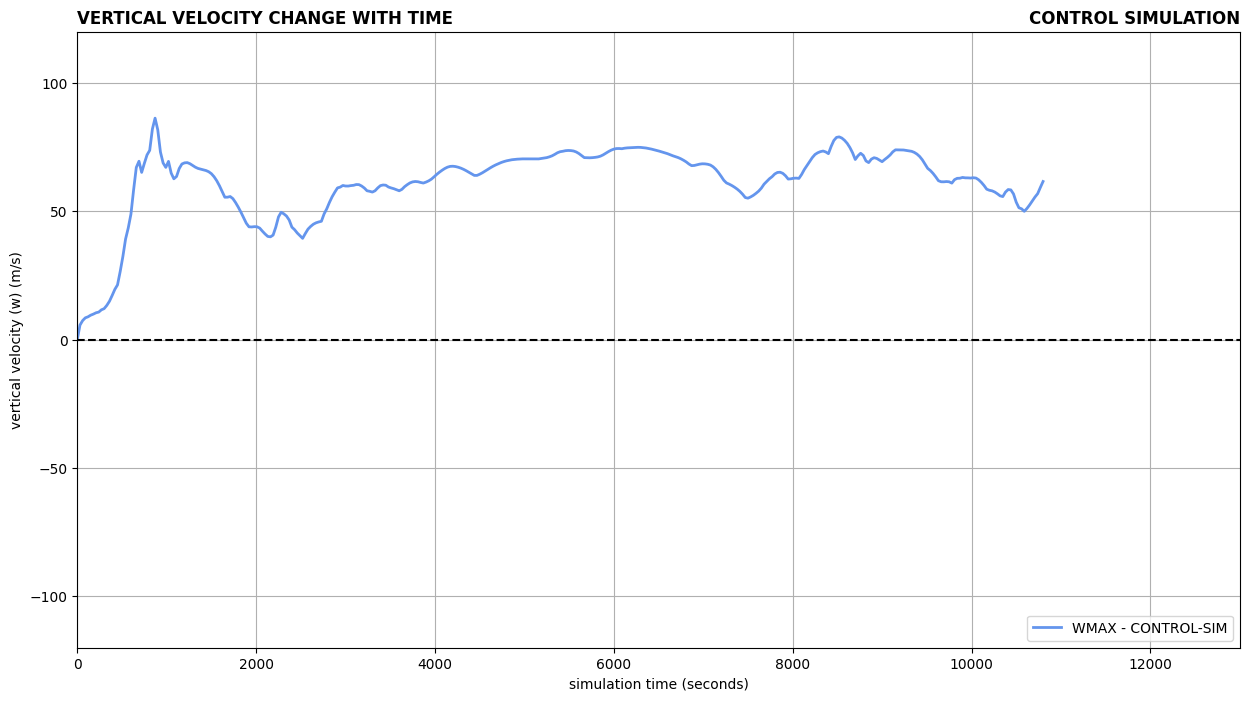

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################

# what variables do we need?: time, wmax, & wmin

# ---- CONTROL SIMULATION ---- #
control_time = ds_control_stats['time'][:]
control_wmax = ds_control_stats['wmax'][:]




#################################
# BUILD THE PLOT
#################################

#### DECLARE THE FIGURE AND AXIS ####
fig, ax = plt.subplots(figsize=(15,8))




#### PLOT CONTROL SIM DATA ####
ax.plot(control_time, control_wmax, linestyle='-', linewidth=2, color='cornflowerblue', label='WMAX - CONTROL-SIM')


#### SIMPLE PLOT ENHANCEMENTS ####
# plot a straight horizontal line at y=0
# this really helps visualize the difference in + and - values
ax.axhline(y=0, color='k', linestyle='--')

# add a legend
ax.legend(loc='lower right')

# add a grid
ax.grid(True)

# define axis limits
ax.set_ylim(-120, 120)
ax.set_xlim(0, 13000)




#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
ax.set_xlabel('simulation time (seconds)')
ax.set_ylabel('vertical velocity (w) (m/s)')
ax.set_title('VERTICAL VELOCITY CHANGE WITH TIME', loc='left', weight='bold')
ax.set_title('CONTROL SIMULATION', loc='right', weight='bold')

plt.show()

<br>
<br>

### **PART 1b**: Great! Now, build a plot that *compares* both maximum vertical velocity & minimum vertical velocity of the control simulation to the high-resolution simulation

- General procedure:
  1. define variables
  2. create `ax.plot()`'s for each variable
    - make necessary adjustments to the color, linestyle, & label, to differentiate between the different variables
  3. make adjustments to the plot title

  <br>

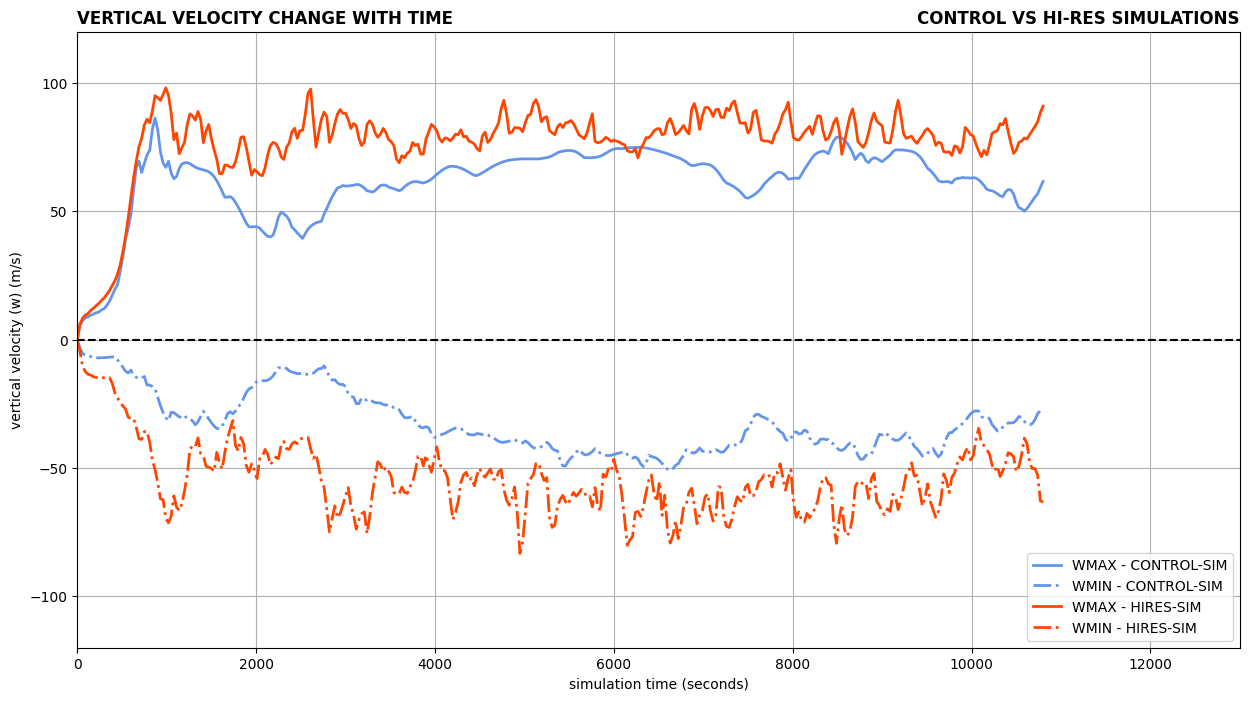

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################

# what variables do we need?: time, wmax, & wmin

# ---- CONTROL SIMULATION ---- #
control_time = ds_control_stats['time'][:]
control_wmax = ds_control_stats['wmax'][:]
control_wmin = ds_control_stats[???][:]

# ---- HI-RES SIMULATION ---- #
highres_time = ds_highres_stats['time'][:]
highres_wmax = ???
highres_wmin = ???







#################################
# BUILD THE PLOT
#################################

#### DECLARE THE FIGURE AND AXIS ####
fig, ax = plt.subplots(figsize=(15,8))




#### PLOT CONTROL SIM DATA ####
ax.plot(control_time, control_wmax, linestyle='-', linewidth=2, color='cornflowerblue', label='WMAX - CONTROL-SIM') # CONTROL WMAX
ax.plot(???) # CONTROL WMIN (hint: use linestyle='-.' for dot-dash line)

#### PLOT HI-RES SIM DATA ####
# Make sure to set line widths, line colors, and labels!
ax.plot(???) # HI RES WMAX
ax.plot(???) # HI RES WMIN (use dot-dash line)




#### SIMPLE PLOT ENHANCEMENTS ####
# plot a straight horizontal line at y=0
# this really helps visualize the difference in + and - values
ax.axhline(y=0, color='k', linestyle='--')


# add a legend
ax.legend(loc='lower right')

# add a grid
ax.grid(True)

# define axis limits
ax.set_ylim(-120, 120)
ax.set_xlim(0, 13000)





#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
ax.set_xlabel('simulation time (seconds)')
ax.set_ylabel('vertical velocity (w) (m/s)')
ax.set_title('VERTICAL VELOCITY CHANGE WITH TIME', loc='left', weight='bold')
ax.set_title('CONTROL VS HI-RES SIMULATIONS', loc='right', weight='bold')

plt.show()

<br>
<br>

Awesome! Now we need to analyze the large time-step simulation. But, before we do so, lets recall a few things...

  - *recall* -- in the large time-step simulation, we kept the 'dx', 'dy', & 'dz' settings the same *but* we increased the time-step of the simulation.

  - *recall* -- the relationship between spacial resolution and temporal resolution in numerical modeling!


$$
C = {u}\frac{\Delta t}{\Delta x} \leq C_{max}
$$

  - Where:
    - u is the velocity
    - Δt is the time step
    - Δx is the spatial step

  ....keep this in mind for a later step


<br>


### **PART 1c** Now, repurposing code from above, create a plot of maximum and minimum vertical velocity for the large time-step simulation

<br>


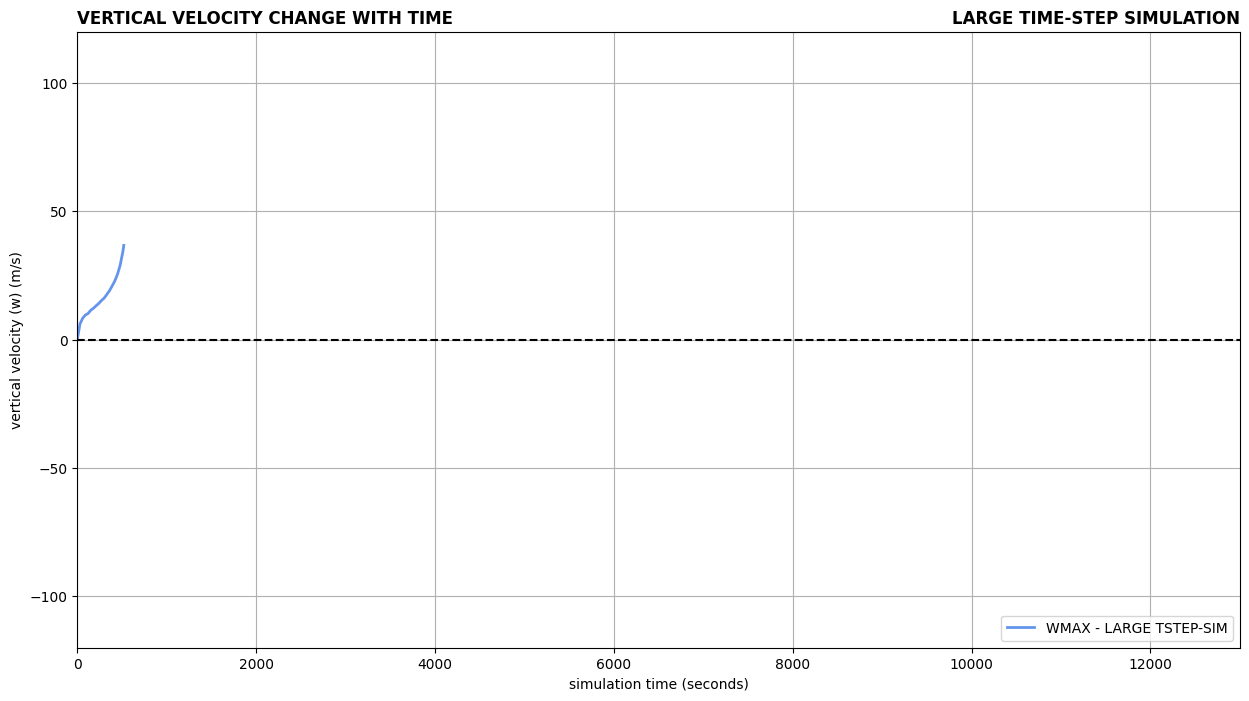

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################

lrgtstp_time = ds_lrgtstp_stats[???][:]

lrgtstp_wmax = ???

#################################
# BUILD THE PLOT
#################################

#### DECLARE THE FIGURE AND AXIS ####
fig, ax = plt.subplots(figsize=(15,8))




#### PLOT CONTROL SIM DATA ####
# Make sure to set line widths, line colors, and labels!
ax.plot(???) # LARGE TSTEP WMAX



#### SIMPLE PLOT ENHANCEMENTS ####
# plot a straight horizontal line at y=0
# this really helps visualize the difference in + and - values
ax.axhline(???)


# add a legend
ax.legend(???)

# add a grid
ax.grid(True)

# define axis limits
ax.set_ylim(???)
ax.set_xlim(???)





#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
ax.set_xlabel('simulation time (seconds)')
ax.set_ylabel('vertical velocity (w) (m/s)')
ax.set_title('VERTICAL VELOCITY CHANGE WITH TIME', loc='left', weight='bold')
ax.set_title('LARGE TIME-STEP SIMULATION', loc='right', weight='bold')

plt.show()

<br>
<br>

#### Hmmmmm......... something doesn't look right, does it? Are we missing data for this simulation? Did you create the plot correctly?

  - You definitely made the plot correctly (hopefully :) ).
  - Perhaps something went wrong during the simulation, then?

  <br>

**How can we investigate this????**

<br>

Hints:
  - Revist the "recalls" section provided in the previous step
  - Look through the variables of the `ds_lrgtstp_stats` again to search for a possibly useful variable to help diagnose the situation
    - ex: `ds_lrgtstp_stats.variables.keys()`

  - if you find something that might be useful, repurpose the code from above to create a time series plot of it
    - tip: you'll have to change (or remove) the axis limits if you aren't plotting vertical velocity
    - don't forget to change your titles & axis labels!!

<br>

In [ ]:
# large time-step simulation variables
ds_lrgtstp_stats.variables.keys()

dict_keys(['xh', 'yh', 'zh', 'time', 'mtime', 'wmax', 'wmin', 'zwmax', 'zwmin', 'cflmax', 'kshmax', 'ksvmax'])

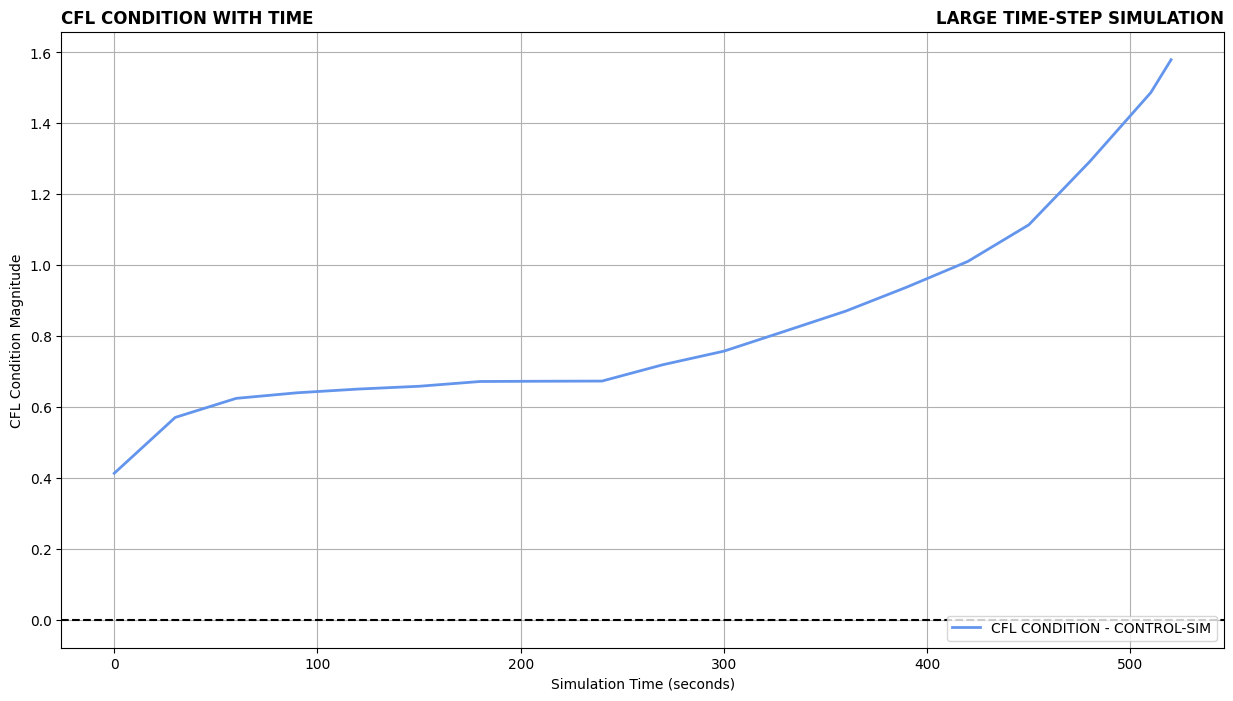

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################

lrgtstp_time = ds_lrgtstp_stats['time'][:]

# Read in a variable here that will help you diagnose the wmax plot for the LARGE TSTEP SIM
???



#################################
# BUILD THE PLOT
#################################

#### DECLARE THE FIGURE AND AXIS ####
fig, ax = plt.subplots(figsize=(15,8))


#### PLOT CONTROL SIM DATA ####
# Make sure to set line widths, line colors, and labels!
ax.plot(???)


#### SIMPLE PLOT ENHANCEMENTS ####
# add a legend
ax.legend(???)

# add a grid
ax.grid(True)


#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
ax.set_xlabel('Simulation Time (seconds)')
ax.set_ylabel(???)
ax.set_title(???, loc='left', weight='bold')
ax.set_title('LARGE TIME-STEP SIMULATION', loc='right', weight='bold')

plt.show()

-----
<br>
<br>
<br>
<br>
<br>
<br>

# **PART 2**: ANALYZE GRIDDED SIMULATION DATA

Cool! You have completed the statistical analysis of your CM1 data. Now for the fun part -- lets look at what we created in CM1! [evil laugh]

<br>

### Before we get started, here's a few things to recall:
  - Gridded data will have a more "complex" shape (more dimensions)
    - dimensions of time, z, x, & y
  - The 'shape' of our control run gridded CM1 data is `(13, 20, 100, 100)`
  - The 'shape' of our high-res run gridded CM1 data is `(13, 80, 400, 400)`
  - To create 2D plots of 4D data, we must "slice" the data such that we change its shape to 2D.

<br>
<br>

### A Tutorial on Slicing Complex Data

Say we have a variable, `some_variable`. It's shape is `(13, 80, 400, 400)`. Lets say we want to make a 2D plot of `some_variable` at time=2700 (seconds) and at the lowest zertical level, z=0 (km). We need to "slice" `some_variable`.

<br>

The best way to do this is by first inspecting the `time` variable:
```python
highres_time = ds_highres_grid['time'][:]

print(highres_time)
```
which prints out the values of time (in seconds):
```
[    0.   900.  1800.  2700.  3600.  4500.  5400.  6300.  7200.  8100.
  9000.  9900. 10800.]
```

Ok great, we can see that `2700` is a valid time. Now, we need to find the 'index' of the value `2700` in the time variable. You can think of an "index" as it's "address".

<br>

This is an easy task using `numpy`'s `np.where()` function. This esentially says "find -where- a given value (2700 in this case) exists within a given variable (time in this case)" -- the "where" is the "index"!:

```python
np.where(highres_time==2700)[0][0]
```
will return the index:
```
3
```
Sweet! Now we know that 2700 seconds is the 3rd value of the time variable (recall that the inital value is the '0th' value).


<br>

What we can now do is set this to it's own variable and then 'slice' `some_variable`!:
```python
# create the time variable
highres_time = ds_highres_grid['time'][:]

# find the index of time = 2700
time2700 = np.where(highres_time==2700)[0][0]

'''
slice `some_variable`
- slice the time dimension with `time2700`
- slice the z dimension with `0` (for the lowest level)
- use `:` to keep the other dimensions the same
'''
sliced_variable = some_variable[time2700, 0, :, :]

# return the new variable's shape
sliced_variable.shape
```
running the `.shape` of slice_variable returns:
```
(400, 400)
```
Cool! We have reduced the dimensions to just x and y, so now our variable is 2D!


<br>
<br>
<br>

#### **PART 2A**: Build a plan-view plot of lowest-level reflectivity at T = 60 min, T = 120 min, and T = 180 min.

Hints:
  - because our x & y coordinates are in kilometers and not in latitude/longitude, a "plan view" plot is simply an x/y plot (like above) where the axes are X (km) and Y (km).
  - check your units!!
  - if we are plotting 2D data with contours (model reflectivity), we need to use `ax.contourf()`


Text(0.5, 1.0, 'LOWEST-LEVEL MODEL REFLECTIVITY AT t=180min')

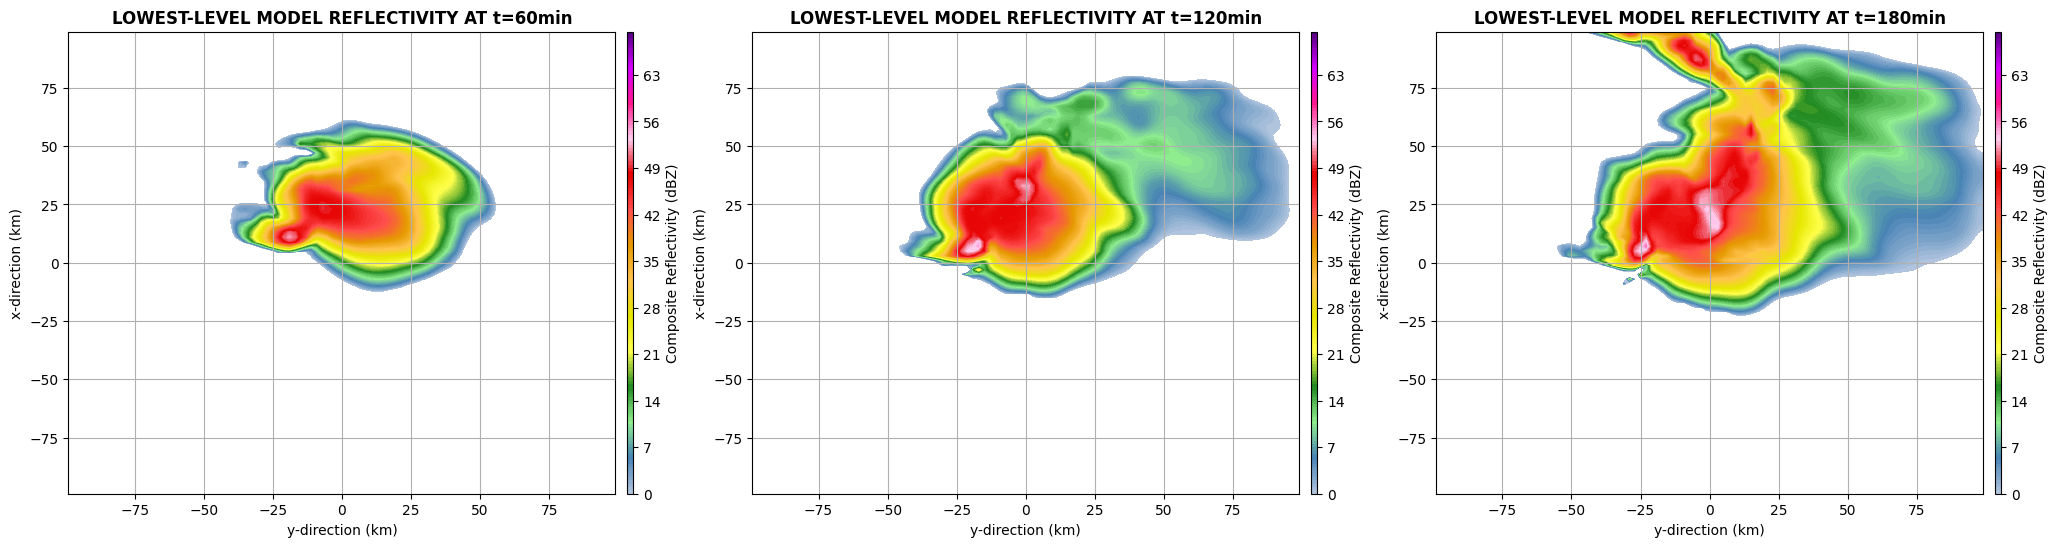

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################



# ---- CONTROL SIMULATION ---- #
# create time, x, y, and dbz variables
control_time = ds_control_grid['time'][:]
control_dbz = ds_control_grid['dbz'][:]
control_x = ds_control_grid['xh'][:]
control_y = ds_control_grid['yh'][:]


# create time index variables
time60 = np.where(control_time==60*60)[0][0] # Time index at 60 minutes
time120 = np.where(???)[0][0] # Time index at 120 minutes
time180 = ??? # Time index at 180 minutes

# create dbz slices
control_dbz_60 = control_dbz[time60, 0, :, :]
control_dbz_120 = control_dbz[???]
control_dbz_180 = ???


#################################
# CREATE A SPECIAL COLORMAP
#################################
# Above we were able to use native matplotlib colormaps for ease. However for some data, especially in meteorology, there are 'standards' (spoken or unspoken)
# for how the data is displayed. Let's make a special colormap for our Composite Reflectivity plot that mimics the NWS reflectivity colortable.
# We can do this using `matplotlib`'s `LinearSegmentedColormap.from_list()` function, which allows us to build a custom colormap from a list of colors!
from matplotlib.colors import LinearSegmentedColormap
radar_cmap  = LinearSegmentedColormap.from_list('custom_cmap',['lightsteelblue','steelblue','lightgreen','forestgreen',
                                                [255/255,255/255,77/255],[230/255,230/255,0],[255/255,195/255,77/255],[230/255,153/255,0],
                                                 [255/255,77/255,77/255],[230/255,0,0],[255/255,204/255,238/255],[255/255,25/255,140/255],
                                                  [212/255,0,255/255],[85/255,0,128/255]],N=256)




#################################
# BUILD THE PLOT
#################################
fig, axs = plt.subplots(1, 3, figsize=(25, 6))




#### AXIS 0 ####################################################################################

contourf0 = axs[0].contourf(control_x, control_y, control_dbz_60, np.arange(0, 70, 0.5), cmap=radar_cmap)

cbar = plt.colorbar(contourf0, aspect=70, fraction=0.02, ax=axs[0], orientation='vertical', pad=0.02)
cbar.set_label('Composite Reflectivity (dBZ)')

# add a grid
axs[0].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[0].set_xlabel('y-direction (km)')
axs[0].set_ylabel('x-direction (km)')
axs[0].set_title('LOWEST-LEVEL MODEL REFLECTIVITY AT t=60min', fontsize=12, weight='bold')







#### AXIS 1 ####################################################################################

contourf1 = axs[1].contourf(???)

cbar = plt.colorbar(contourf1, aspect=70, fraction=0.02, ax=axs[1], orientation='vertical', pad=0.02)
cbar.set_label(???)


# add a grid
axs[1].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[1].set_xlabel(???)
axs[1].set_ylabel(???)
axs[1].set_title('LOWEST-LEVEL MODEL REFLECTIVITY AT t=120min', fontsize=12, weight='bold')







#### AXIS 2 ####################################################################################

contourf2 = ???

cbar = ???
cbar.set_label(???)

# add a grid
axs[2].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[2].set_xlabel(???)
axs[2].set_ylabel(???)
axs[2].set_title(???)

Text(0.5, 1.0, 'LOWEST-LEVEL MODEL REFLECTIVITY AT t=180min')

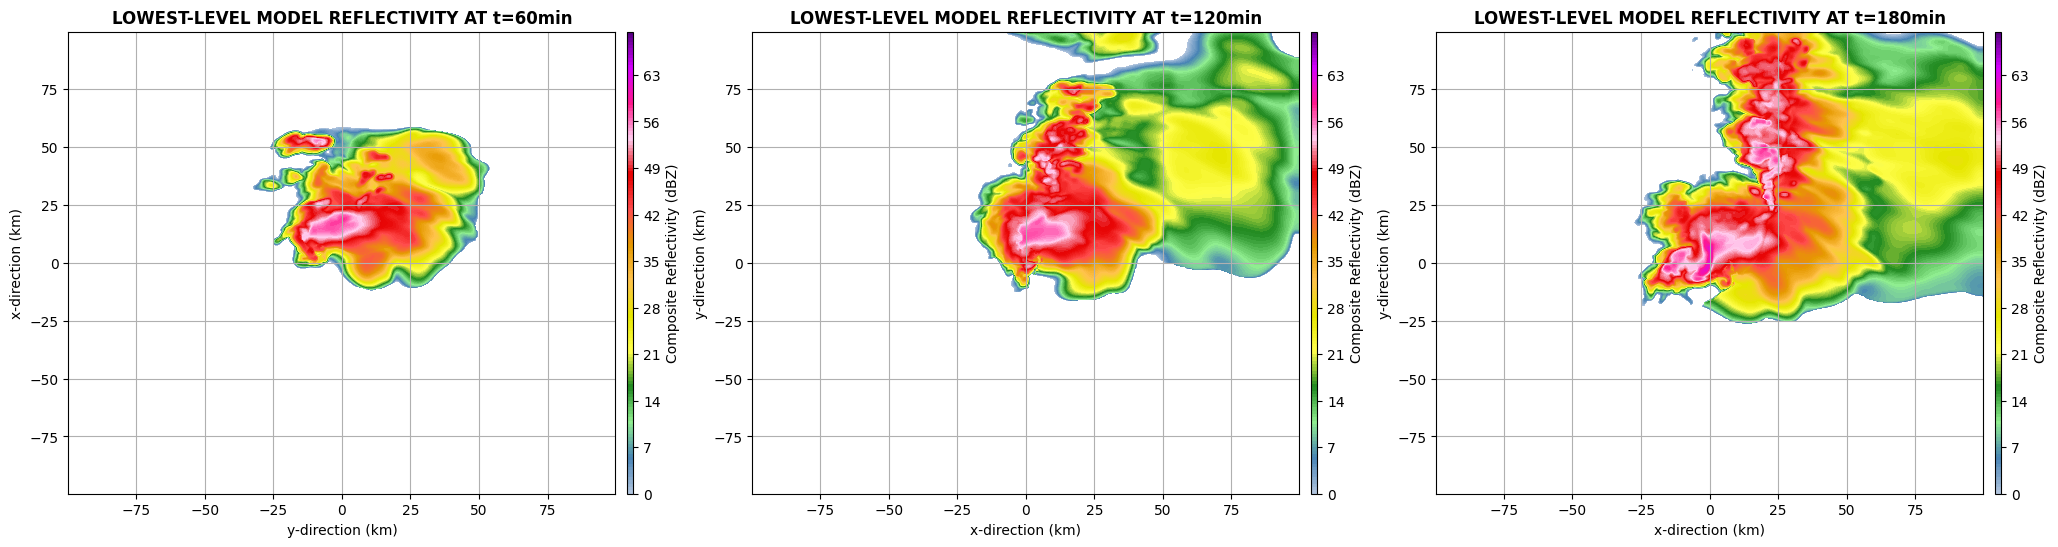

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################



# ---- CONTROL SIMULATION ---- #
# create time, x, y, and dbz variables
highres_time = ???
highres_dbz = ???
highres_x = ???
highres_y = ???


# create time index variables
time60 = ???
time120 = ???
time180 = ???

# create dbz slices
highres_dbz_60 = ???
highres_dbz_120 = ???
highres_dbz_180 = ???


#################################
# CREATE A SPECIAL COLORMAP
#################################
# Above we were able to use native matplotlib colormaps for ease. However for some data, especially in meteorology, there are 'standards' (spoken or unspoken)
# for how the data is displayed. Let's make a special colormap for our Composite Reflectivity plot that mimics the NWS reflectivity colortable.
# We can do this using `matplotlib`'s `LinearSegmentedColormap.from_list()` function, which allows us to build a custom colormap from a list of colors!
from matplotlib.colors import LinearSegmentedColormap
radar_cmap  = LinearSegmentedColormap.from_list('custom_cmap',['lightsteelblue','steelblue','lightgreen','forestgreen',
                                                [255/255,255/255,77/255],[230/255,230/255,0],[255/255,195/255,77/255],[230/255,153/255,0],
                                                 [255/255,77/255,77/255],[230/255,0,0],[255/255,204/255,238/255],[255/255,25/255,140/255],
                                                  [212/255,0,255/255],[85/255,0,128/255]],N=256)




#################################
# BUILD THE PLOT
#################################
fig, axs = plt.subplots(1, 3, figsize=(25, 6))




#### AXIS 0 ####################################################################################

contourf0 = axs[0].contourf(???, ???, ???, np.arange(0, 70, 0.5), cmap=radar_cmap)

cbar = plt.colorbar(contourf0, aspect=70, fraction=0.02, ax=axs[0], orientation='vertical', pad=0.02)
cbar.set_label('Composite Reflectivity (dBZ)')

# add a grid
axs[0].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[0].set_xlabel('y-direction (km)')
axs[0].set_ylabel('x-direction (km)')
axs[0].set_title('LOWEST-LEVEL MODEL REFLECTIVITY AT t=60min', fontsize=12, weight='bold')







#### AXIS 1 ####################################################################################

contourf1 = axs[1].contourf(???)

cbar = plt.colorbar(???)
cbar.set_label(???)


# add a grid
axs[1].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[1].set_xlabel(???)
axs[1].set_ylabel(???)
axs[1].set_title(???, fontsize=12, weight='bold')







#### AXIS 2 ####################################################################################

# No starter code for this one! Use code from Axis 0 and Axis 1 to help make your final reflectivity plot!
???

???
???

# add a grid
???
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
???
???
???

<br>
<br>
<br>

#### **PART 2B**: Vertical Cross Section "Slices" through 4D data

Another useful tool we can explore to help us analyze 4D gridded data are vertical cross sections.

In Python the process is relatively simple:
  1. First slice 4D data for a specific time (making it 3D)
  2. then slice 3D data, along the x or y axis, to create a "slice" through that axis (making is 2D)

Consider a loaf of sliced bread. Where the dimensions are x, y, & z, or length, width, and height. If we "take out" a slice of the bread from the middle of the loaf, we now have a "slice" or "cross section" of bread with dimensions of width (y) and height (z). We can do the same with 4D gridded data.

Below is an example using our CM1 data. You don't have to alter this code, just run the cell. This will create a slice of model reflectivity, through the y-axis at y~-1, and at time=120 minutes, for both the control and high-resolution simulations.

<br>
<br>


Text(0.5, 1.0, 'HIGHRES SIM | LOWEST-LEVEL MODEL REFLECTIVITY AT t=120min')

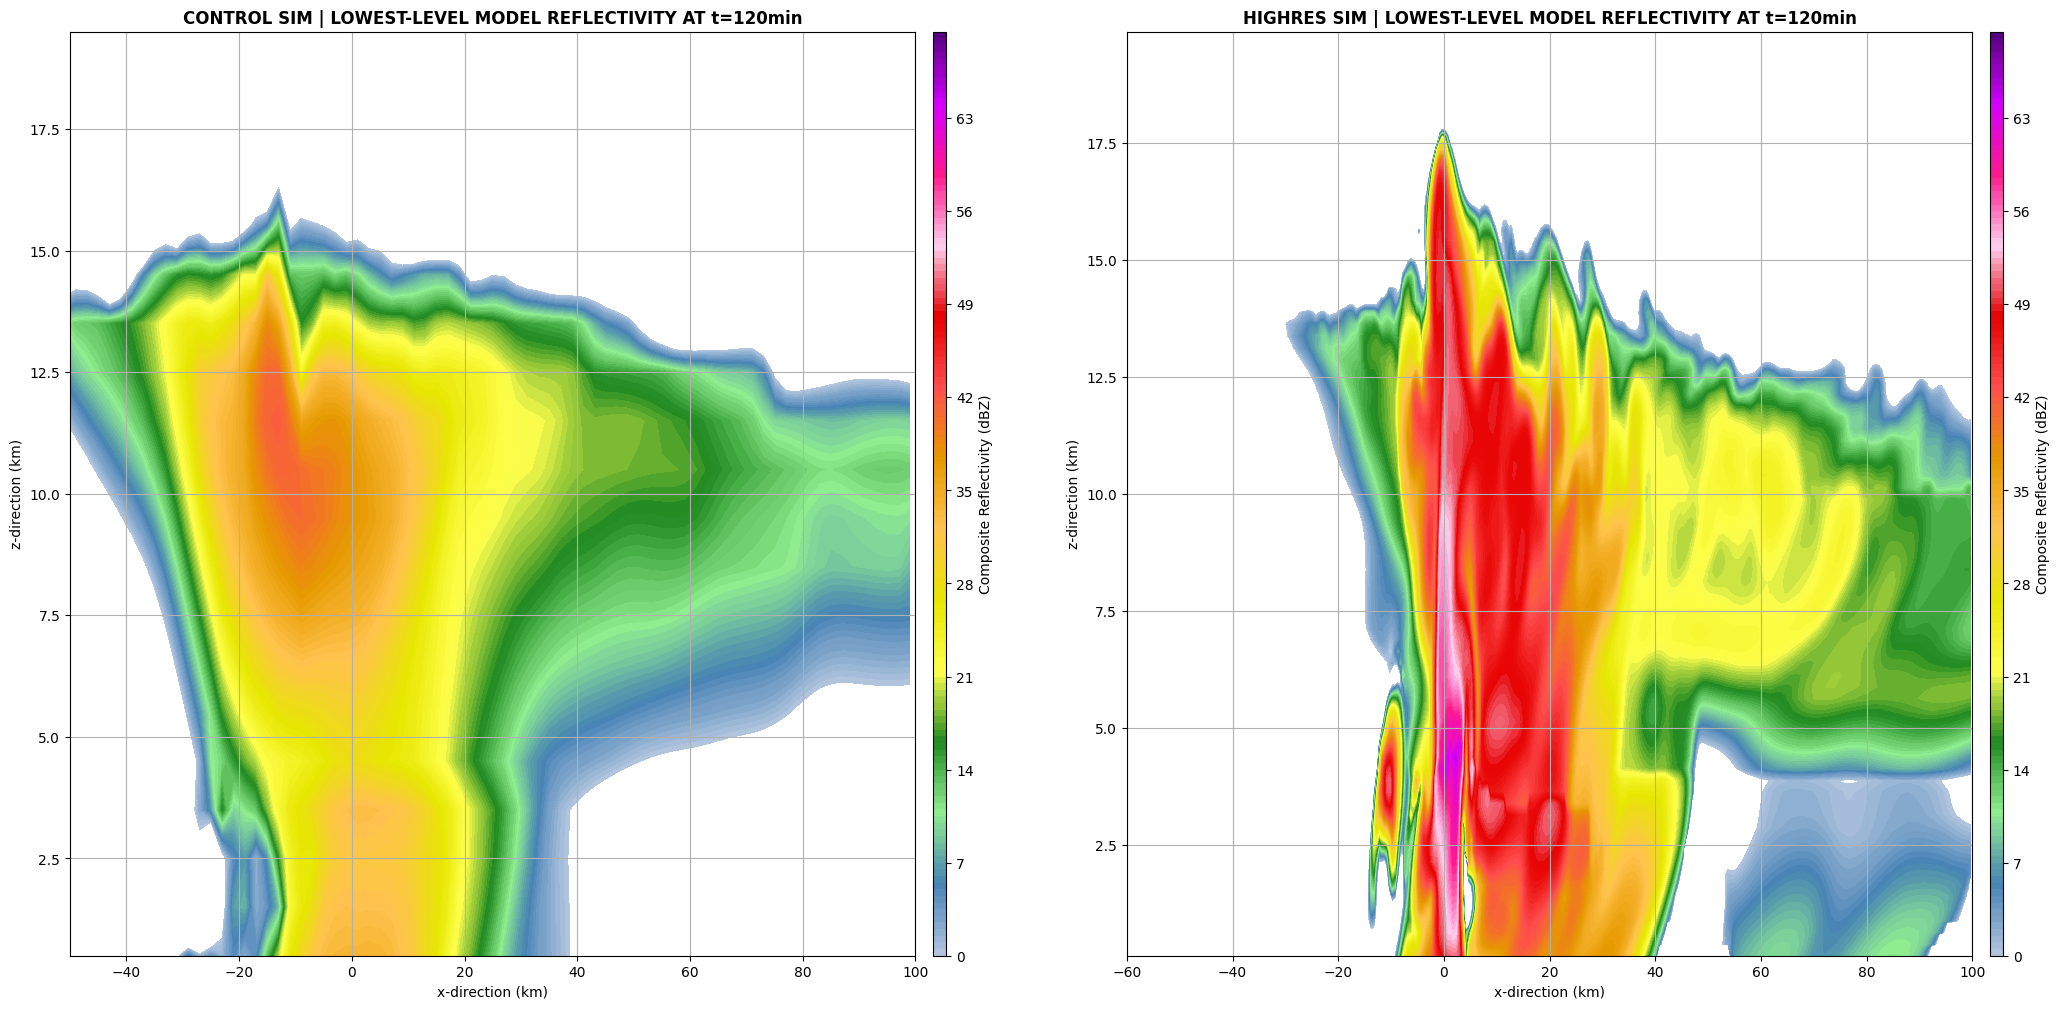

In [ ]:
#################################
# DECLARE THE VARIABLES WE NEED
#################################

# ---- HIGHRES SIMULATION ---- #
# create time, x, y, and dbz variables
highres_time = ds_highres_grid['time'][:]
highres_dbz = ds_highres_grid['dbz'][:]
highres_x = ds_highres_grid['xh'][:]
highres_y = ds_highres_grid['yh'][:]
highres_z = ds_highres_grid['zh'][:]


# ---- CONTROL SIMULATION ---- #
# create time, x, y, and dbz variables
control_time = ds_control_grid['time'][:]
control_dbz = ds_control_grid['dbz'][:]
control_x = ds_control_grid['xh'][:]
control_y = ds_control_grid['yh'][:]
control_z = ds_control_grid['zh'][:]






#################################
# CREATE SLICES THROUGH THE DATA
#################################

# time slices
highres_time_slice = np.where(highres_time==120*60)[0][0]
control_time_slice = np.where(???)[0][0]

# y-axis slices
# note that the resolution of the control simulation and
# high-res simulations are different, so here we find the
# closest value to y =-1
highres_y_slice = np.where(highres_y==-0.75000006)[0][0]
control_y_slice = np.where(control_y==-1.)[0][0]




#################################
# SLICE DBZ DATA
#################################

highres_dbz_slice = highres_dbz[highres_time_slice, :, highres_y_slice, :]
control_dbz_slice = control_dbz[???, :, ???, :]




#################################
# BUILD THE PLOT
#################################
fig, axs = plt.subplots(1, 2, figsize=(25, 12))





#### AXIS 0 ####################################################################################
# Remember that contourf uses function arguments as: contourf(x_variable, y_variable, z_variable, ... other keyword arguments)
# The z_variable is the variable with the data you are plotting
# Since we are now doing a cross section along the x-axis, what is our x-, y-, and z- variable in contourf for the control run?
contourf0 = axs[0].contourf(???, ???, ???, np.arange(0, 70, 0.5), cmap=radar_cmap)

cbar = plt.colorbar(contourf0, aspect=70, fraction=0.02, ax=axs[0], orientation='vertical', pad=0.02)
cbar.set_label('Composite Reflectivity (dBZ)')

# add axis limits
axs[0].set_xlim(-50, 100)

# add a grid
axs[0].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[0].set_xlabel('x-direction (km)')
axs[0].set_ylabel('z-direction (km)')
axs[0].set_title('CONTROL SIM | LOWEST-LEVEL MODEL REFLECTIVITY AT t=120min', fontsize=12, weight='bold')





#### AXIS 1 ####################################################################################
# Use code from Axis 0 to make your final cross-section plot of model reflectivity for the HIGH RES SIM!
contourf1 = axs[1].contourf(???)

cbar = plt.colorbar(???)
cbar.set_label(???)

# add axis limits
axs[1].set_xlim(???)

# add a grid
axs[1].grid(True)
#### PLOT TITLES AND LABELS ####
# add axis labels and a plot title
axs[1].set_xlabel(???)
axs[1].set_ylabel(???)
axs[1].set_title(???)


